## Assigment 1

In [15]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

import data_preprocessing
from Linear import LinearRegressor

### KNN - Classifier

In [ ]:
# Insert Code Here

### Linear Regression

In [2]:
# Data
x_train, t_train = data_preprocessing.get_training_data()
x_validation, t_validation = data_preprocessing.get_validation_data()
x_test, t_test = data_preprocessing.get_test_data()

In [13]:
# Array to hold the MSE and MAE for each model
losses = []
models = []

Manual Linear Regression (Direct Solution)

In [ ]:
Model1 = LinearRegressor(x_train, t_train, x_train.shape[1])
Model1.calc_direct_sol()
error, mse, mae = Model1.calc_loss(x_validation, t_validation)
print(f"Validation MSE: {mse:.2f}, MAE: {mae:.2f}")
losses.append(('Linear Direct Solution', mse, mae))
models.append(Model1)

Validation MSE: 0.33, MAE: 0.42


Manual Linear Regression (Gradient Descent)

In [ ]:
Model2 = LinearRegressor(x_train, t_train, x_train.shape[1])
Model2.optimize_gd(learning_rate=0.01, max_iter=1000, tolerance=0.001)
error, mse, mae = Model2.calc_loss(x_validation, t_validation)
losses.append(('Linear Gradient Descent', mse, mae))
print(f"Validation MSE: {mse:.2f}, MAE: {mae:.2f}")
models.append(Model2)

Iteration 0: MSE = 1.00, MAE = 0.79
Iteration 100: MSE = 0.39, MAE = 0.47
Iteration 200: MSE = 0.38, MAE = 0.46
Iteration 300: MSE = 0.37, MAE = 0.45
Iteration 400: MSE = 0.37, MAE = 0.45
Iteration 500: MSE = 0.37, MAE = 0.44
Iteration 600: MSE = 0.36, MAE = 0.44
Iteration 700: MSE = 0.36, MAE = 0.44
Iteration 800: MSE = 0.36, MAE = 0.44
Iteration 900: MSE = 0.36, MAE = 0.44
Validation MSE: 0.33, MAE: 0.43


In [ ]:
# Chooosing best learning rate
learning_rates= [0.001, 0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.128]


Scikit-Learn Linear Regression

In [ ]:
Model3 = LinearRegression()
Model3.fit(x_train, t_train)
y_val = Model3.predict(x_validation)
mse= mean_squared_error(t_validation, y_val)
mae= mean_absolute_error(t_validation, y_val)
print(f"Validation MSE: {mse:.2f}, MAE: {mae:.2f}")
losses.append(('Scikit-Learn Linear Regression', mse, mae))
models.append(Model3)

Validation MSE: 0.33, MAE: 0.42


### Lasso Regression

Scikit-Learn

In [19]:
Model4 = Lasso(alpha=0.1)
Model4.fit(x_train, t_train)
y_val = Model4.predict(x_validation)
mse= mean_squared_error(t_validation, y_val)
mae= mean_absolute_error(t_validation, y_val)
print(f"Validation MSE: {mse:.2f}, MAE: {mae:.2f}")

Validation MSE: 0.42, MAE: 0.49


Choosing best Regularization parameter

Training Lasso Regression with lambda=0.0001
Validation MSE: 0.33, MAE: 0.42 for lambda=0.0001
Training Lasso Regression with lambda=0.001
Validation MSE: 0.33, MAE: 0.42 for lambda=0.001
Training Lasso Regression with lambda=0.01
Validation MSE: 0.34, MAE: 0.43 for lambda=0.01
Training Lasso Regression with lambda=0.1
Validation MSE: 0.42, MAE: 0.49 for lambda=0.1
Training Lasso Regression with lambda=1
Validation MSE: 0.99, MAE: 0.79 for lambda=1
Training Lasso Regression with lambda=10
Validation MSE: 0.99, MAE: 0.79 for lambda=10
Training Lasso Regression with lambda=100
Validation MSE: 0.99, MAE: 0.79 for lambda=100
Training Lasso Regression with lambda=1000
Validation MSE: 0.99, MAE: 0.79 for lambda=1000
Best lambda: 0.0001 with MSE: 0.33 and MAE: 0.42


c:\Users\Abdel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.428e+02, tolerance: 1.445e+00
  model = cd_fast.enet_coordinate_descent(


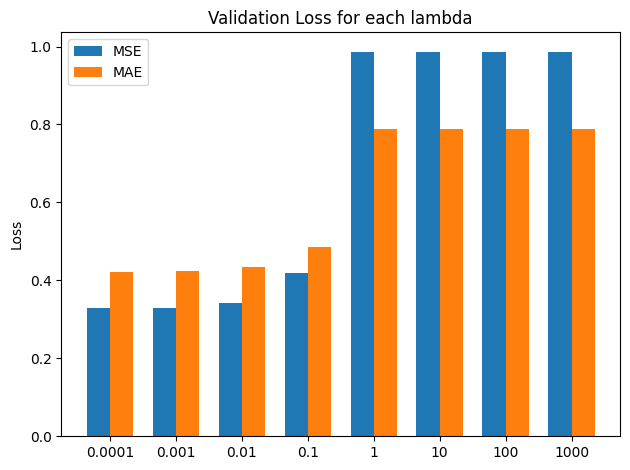

In [ ]:
lambdas= [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
lassos = []
for l in lambdas:
    Model4 = Lasso(alpha=l, max_iter=10000)
    print(f"Training Lasso Regression with lambda={l}")
    Model4.fit(x_train, t_train)
    y_val = Model4.predict(x_validation)
    mse= mean_squared_error(t_validation, y_val)
    mae= mean_absolute_error(t_validation, y_val)
    print(f"Validation MSE: {mse:.2f}, MAE: {mae:.2f} for lambda={l}")
    lassos.append((l, mse, mae))


# Best lambda model
best_lasso = min(lassos, key=lambda x: x[1])
Model4 = Lasso(alpha=best_lasso[0])
Model4.fit(x_train, t_train)
print(f"Best lambda: {best_lasso[0]} with MSE: {best_lasso[1]:.2f} and MAE: {best_lasso[2]:.2f}")
losses.append(('Scikit-Learn Lasso Regression', best_lasso[1], best_lasso[2]))
models.append(Model4)

# Plotting the losses
model_names = [lassos[0] for lassos in lassos]
mse_values = [lassos[1] for lassos in lassos]
mae_values = [lassos[2] for lassos in lassos]

x = np.arange(len(model_names))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')
ax.set_ylabel('Loss')
ax.set_xlabel('Lambda Values')
ax.set_title('Validation Loss for each lambda')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
plt.tight_layout()
plt.show()


#### Ridge Regression